# `Tesseract-OCR`


---


*By. Richie*

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.download("./image_frames/frame337.png")

In [ ]:
import requests  
file_url = "https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata"
    
r = requests.get(file_url, stream = True)  
  
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)  

# Library and Dependency

In [ ]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

In [ ]:
! pip install pytesseract wand opencv-python

In [ ]:
from PIL import Image
import pytesseract
from wand.image import Image as Img
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import numpy as np
import os
import cv2
from datetime import timedelta
from matplotlib import pyplot as plt
import shutil
import datetime

# Image to String

In [ ]:
try:
   img=Image.open('./image_frames/frame337.png')
   custom_config = r'-l ind --oem 3 --psm 6' 
   text = pytesseract.image_to_string(img,config=custom_config)
   print(text)
except IOError as e:
    print("Couldn't open or write to file (%s)." % e)


Selamat d Ilmu Temek Perehl


In [ ]:
print(pytesseract.image_to_string(Image.open('/content/test.jpg')))

# Video Subtitle to String

In [ ]:
if not os.path.exists('image_frames'):
    os.makedirs('image_frames')
 
test_vid = cv2.VideoCapture('/content/drive/My Drive/Otakudesu_GinSaji--01_720p_BD_cut_001.mp4')


index = 0
while test_vid.isOpened():
    ret,frame = test_vid.read()
    if not ret:
        break


    name = './image_frames/frame' + str(index) + '.png'
    

    print ('Extracting frames...' + name)
    cv2.imwrite(name, frame[550:800, 50:1200])
    index = index + 1
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
test_vid.release()
cv2.destroyAllWindows()  

from IPython.display import HTML, clear_output

clear_output()

file_count = sum(len(files) for _, _, files in os.walk(r'./image_frames'))
print("Total Frame : "+str(file_count))

Total Frame : 2907


In [ ]:
fps = 24.0
def get_srt_timestamp(frame_index: int, fps: float):
	td = datetime.timedelta(seconds=frame_index / fps)
	ms = td.microseconds // 1000
	m, s = divmod(td.seconds, 60)
	h, m = divmod(m, 60)
	return '{:02d}:{:02d}:{:02d},{:03d}'.format(h, m, s, ms)
for i in range(file_count):
	asu= get_srt_timestamp(i,fps)
	mmq = Image.open("./image_frames/frame"+ str(i)+".png")
	custom_config = r'-l ind ' 
	text = pytesseract.image_to_string(mmq,config=custom_config)
	lines = text.split("\n")
	kosongin = [line for line in lines if line.strip() != ""]
	kosong = ""
	for line in kosongin:
		kosong += line + "\n"
	if text != "\n" :
		print("frame"+str(i)+" "+str(asu)+ ":" + kosong) 

frame0 00:00:00,000:
frame1 00:00:00,041:
frame2 00:00:00,083:
frame3 00:00:00,125:
frame4 00:00:00,166:
frame5 00:00:00,208:
frame6 00:00:00,250:
frame7 00:00:00,291:
frame8 00:00:00,333:
frame9 00:00:00,375:
frame10 00:00:00,416:
frame11 00:00:00,458:
frame12 00:00:00,500:
frame13 00:00:00,541:a0
ai —
7
m4

frame14 00:00:00,583:
frame15 00:00:00,625:
frame16 00:00:00,666:
frame17 00:00:00,708:
frame18 00:00:00,750:
frame19 00:00:00,791:_- .;*S Y 4
39 A P9h, p ya
aaa 7%?h— )

frame20 00:00:00,833:a “a
ar…
P74 J )

frame21 00:00:00,875:
frame22 00:00:00,916:
frame23 00:00:00,958:
frame24 00:00:01,000:
frame25 00:00:01,041:
frame26 00:00:01,083:


KeyboardInterrupt: ignored

# Check FPS and Posistioning CROP

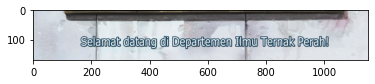

In [ ]:
image = cv2.imread("./image_frames/frame337.png")
cropped_image = image[550:800, 50:1200]
plt.imshow(image)
plt.show()

In [ ]:
if __name__ == '__main__' :

    video = cv2.VideoCapture("Otakudesu_GinSaji--01_720p_BD_cut_001.mp4");

    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

    if int(major_ver)  < 3 :
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
    else :
        fps = video.get(cv2.CAP_PROP_FPS)
        print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

        video.release(); 

Frames per second using video.get(cv2.CAP_PROP_FPS) : 23.963794638440994


In [ ]:
if not os.path.exists('hasilcrop'):
  os.makedirs('hasilcrop')
angka= 101
for a in range(angka):
  image = cv2.imread("./image_frames/frame"+ str(a)+".png")
  cropped_image = image[350:500, 100:780]
  cv2.imwrite("./hasilcrop/crop"+str(a)+".png", cropped_image)

In [ ]:
a_list = ["a", "", "c"]

without_empty_strings = []
for string in a_list:
    if (string != ""):
        without_empty_strings.append(string)
print(without_empty_strings)

['a', 'c']


In [ ]:
from datetime import timedelta

FPS = 24.0
frame_count = 2907
td = timedelta(seconds=(frame_count / FPS))
print(td)

0:02:01.125000
